In [4]:
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image

In [5]:
key_points_data_path = "./data/data2/list_bbox_celeba.csv"
images_data_path = "./data/data2/img"

images_data_size = 35000

# originsl image dimensions
x_org = 178    # original x value
y_org = 218    # original y value

# new image dimensions
x_ = 45                             # new value of x
image_size_ratio = x_org / y_org    # dimensions ratio
y_ = int(image_size_ratio * x_)     # new value of y

# image sizes
original_image_size = (x_org, y_org)
new_image_size = (x_,y_)

# the image size that will be used in the training process
image_size_training = new_image_size
new_image_size

(45, 36)

In [6]:
df_org = pd.read_csv(key_points_data_path)
df_org = df_org[:images_data_size]

# check
df_org.head(3)

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126


In [7]:
df_org.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  35000 non-null  object
 1   x_1       35000 non-null  int64 
 2   y_1       35000 non-null  int64 
 3   width     35000 non-null  int64 
 4   height    35000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ MB


In [8]:
images_data = list()
for idx in range(df_org.shape[0]):
    # to get the path based on index
    path = "{}/{}".format(str(images_data_path),str(df_org.iloc[idx].image_id))
    
    # to read the image
    image = PIL.Image.open(path).resize(image_size_training)
    image_array = np.asarray(image) / 255
    
    # append the image array to images_data
    images_data.append(image_array)
    
# convert images_data to be array not list
images_data = np.array(images_data)

# check
images_data.shape

KeyboardInterrupt: 

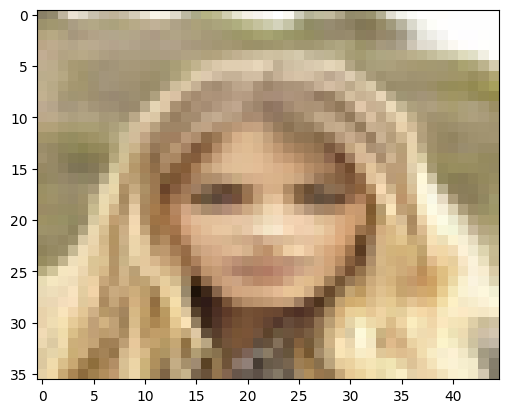

In [7]:
plt.imshow(images_data[18])

In [8]:
print("Images Data Arrays Shape:", images_data.shape)
print("Key Points Data Shape:", df_org.shape)

Images Data Arrays Shape: (35000, 36, 45, 3)
Key Points Data Shape: (35000, 5)


In [10]:
df_org.describe()

,x_1,y_1,width,height
count,35000.000000,35000.000000,35000.000000,35000.000000
mean,157.912514,84.936800,195.991771,270.586514
std,163.626717,78.388446,143.622652,198.027883
min,1.000000,1.000000,5.000000,7.000000
25%,70.000000,44.000000,120.000000,166.000000
50%,111.000000,68.000000,164.000000,227.000000
75%,184.000000,98.000000,221.000000,306.000000
max,2799.000000,1858.000000,2509.000000,3276.000000


In [11]:
# function to read images based on index
def image_array(index, size=image_size_training, path=images_data_path):
    """
    This functions is for converting images to arrays to deal with it in the model.
    
    Input:  index of the image that we want to convert to array
            size of the image that we want for the array of the image
            path of the images data to get the image
            
    Output: the image array as numpy array
    """
    # to get the path based on index
    path = "{}/{}".format(str(path),str(df_org.iloc[index].image_id))
    
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)
    
    return image_array

In [12]:
# function to get a list of all key points of the face
def image_key_points_list(index, df = df_org):
    """
    This function for getting the key points on the face as list to deal with it in plotting sections
    """
    # box dictionary
    points_list = [df.iloc[index].x_1,
                   df.iloc[index].y_1,
                   df.iloc[index].width,
                   df.iloc[index].height,]
    
    return points_list

In [2]:
# function to plot the image with green box around the faces
def plotting_image_with_box(index, df = df_org, size=original_image_size):

    test_image = image_array(index, size)
    points_list = image_key_points_list(index, df)
    print(points_list)
    x, y, w, h = points_list[0], points_list[1], points_list[2], points_list[3]
    
    # Create figure and axes
    fig, ax = plt.subplots()
    # plot the image
    ax.imshow(test_image)
    # plot the points on the face
    ax.plot([x],[y], 'bo-')
    
    # plot the box around the face

    rect = patches.Rectangle((x, y), w, h, linewidth=4, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

NameError: name 'df_org' is not defined

In [3]:
plotting_image_with_box(18)

NameError: name 'plotting_image_with_box' is not defined